In [1]:
#create autograd

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return 3*x**2 - 4 * x + 5 

In [4]:
f(3)

20

In [5]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

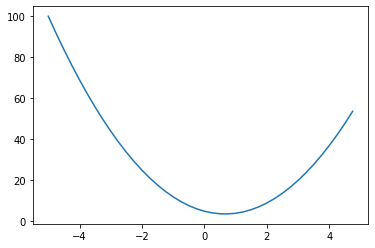

In [6]:
plt.plot(xs,ys)

In [7]:
h = 1e-8
x = 0.66
(f(x + h) - f(x))/h

-0.04000000330961484

LEts get more complex

In [8]:
a = 2
b = -3
c=10
d = a*b +c
d

4

In [9]:
h = 0.0001
a = 2
b = -3
c=10
d1 = a*b +c
a += h
d2 = a*b +c

slope = (d2-d1)/h
slope

-3.000000000010772

In [10]:
h = 0.0001
a = 2
b = -3
c=10
d1 = a*b +c
b += h
d2 = a*b +c

slope = (d2-d1)/h
slope

2.0000000000042206

In [11]:
h = 0.0001
a = 2
b = -3
c=10
d1 = a*b +c
c += h
d2 = a*b +c

slope = (d2-d1)/h
slope

0.9999999999976694

In [12]:
from gympy.autograd import Value

a = Value(2,label = 'a')
b = Value(-3, label = 'b')
c = Value(10, label = 'c')
e = a*b; e.label='e'
d = e + c; d.label = 'd'
f = Value(-2, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-8)

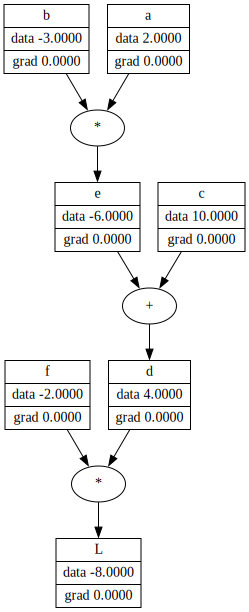

In [13]:
L.draw_dot()

$$
L = d *f \\
\frac{dL}{dd} = f

$$

In [14]:
def dev_lim(h = 1e-3):    
    a = Value(2.,label = 'a')
    b = Value(-3., label = 'b')
    c = Value(10., label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label = 'd'
    f = Value(-2., label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.,label = 'a')
    b = Value(-3+h, label = 'b')
    c = Value(10., label = 'c')
    e = a*b; e.label='e'
    d = e + c; d.label = 'd'
    f = Value(-2., label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data
    g = (L2-L1)/h

    return g
    
g = dev_lim()
g
    
    

-3.9999999999995595

## Example neuron

In [15]:
x1 = Value(2., label='x1')
x2 = Value(0.0, label = 'x2')

w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.7, label='bias')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + 2w2'

n = x1w1x2w2 + b; n.label='n'

o = n.tanh(); o.label='o'
o

Value(data=0.6043677771171636)

In [16]:
o._prev

{Value(data=0.7000000000000002)}

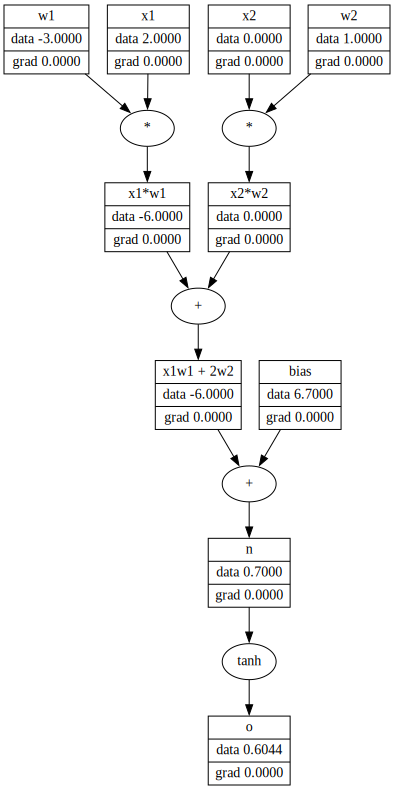

In [17]:
o.draw_dot()

In [18]:
o.sort_topological()

[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.7),
 Value(data=0.7000000000000002),
 Value(data=0.6043677771171636)]

In [19]:
o.backward()


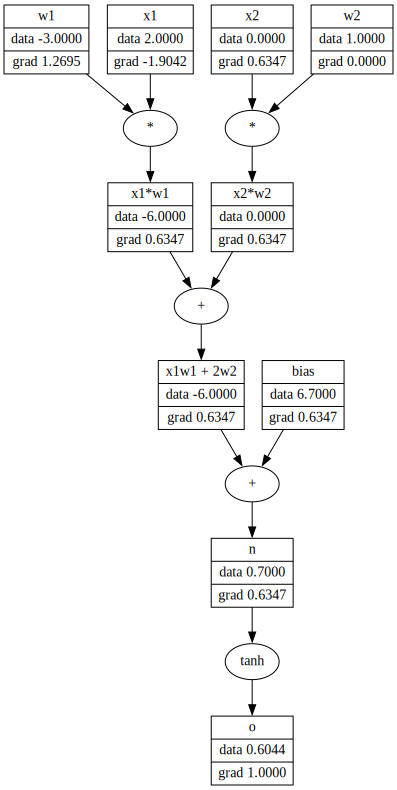

In [20]:
o.draw_dot()

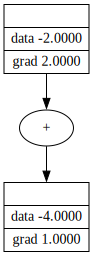

In [21]:
z = Value(-2.0)
c = z + z 
c.backward()
c.draw_dot()

In [22]:
a = Value(2)
b = Value(3)

c = a-b
c.grad=1
c.backward()


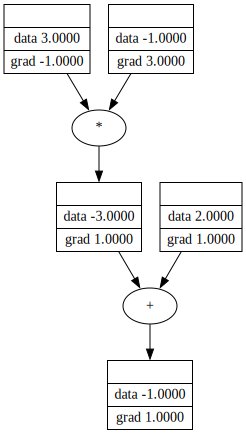

In [23]:
c.draw_dot()

In [25]:
c.sigmoid()

Value(data=0.2689414213699951)

## pytorch example

In [ ]:
import torch 

x1 = torch.Tensor([2.]).double(); x1.requires_grad=True 
x2 = torch.Tensor([0.]).double(); x2.requires_grad=True 
w1 = torch.Tensor([-3.]).double(); w1.requires_grad=True 
w2 = torch.Tensor([1.]).double(); w2.requires_grad=True 
b = torch.Tensor([6.8813]).double(); b.requires_grad=True 
n = x1*w1 + x2*w2 + b 
o = torch.tanh(n)
o.backward()

for i in [x2,w2,x1,w1]:
    print(i.grad)
